In [1]:
###################################################
#####      ASSOCIATION RULE MINING WITH R     #####
###################################################

# So we are talking about association rule mining
# with R.

# free memory
rm(list = ls())
gc()

# Basics of Association Rules

# Association rules are rules presenting association 
# or correlation between itemsets. An association
# rule is in the form of A ==> B, where A and B are 
# two disjoint itemsets, referred to respectively
# as the lhs (left-hand side) and rhs (right-hand side)
# of the rule. The three most widely-used measures
# for selecting interesting rules are:

# support, 
# confidence and 
# lift. 

# Support is the percentage of cases in the data that 
# contain both A and B, or the Union of A and B,
# i.e. support(A => B) = P(A U B)

# Confidence is the percentage of cases containing
# A that also contain B, 
# i.e. confidence(A => B) = P(B|A) = P(A U B)/P(A)

# Lift is the ratio of confidence to the percentage 
# of cases containing B,
# i.e. life(A => B) = confidence(A => B)/P(B) or
# P(A U B)/P(A)P(B)

# where P(A) and P(B) are the percentages (or probability)
# of cases containing A.

# In addition to support, confidence and lift, there 
# are many other interestingness measures, such as
# chi-square, conviction, gini and leverage.

## The Titanic Dataset

# The Titanic dataset in the datasets package is a 
# 4-dimensional table with summarized information
# on the fate of passengers on the Titanic according 
# to social class, sex, age and survival. 

# You have an external R object version of it
# available in your folder, but it is already loaded
# into your session via the datasets package.

# To make it suitable for association rule mining, 
# we reconstruct the raw data as titanic.raw, where 
# each row represents a person.

setwd('C:/Users/Aron/Desktop/Analitica/S10/datasets')

# Is a table at the moment
data(Titanic)

# Is a table....this is why we cannot see frequency
str(Titanic)

# Make it a data frame
df <- as.data.frame(Titanic)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,508125,27.2,1140830,61,621911,33.3
Vcells,939577,7.2,8388608,64,1603505,12.3


 'table' num [1:4, 1:2, 1:2, 1:2] 0 0 35 0 0 0 17 0 118 154 ...
 - attr(*, "dimnames")=List of 4
  ..$ Class   : chr [1:4] "1st" "2nd" "3rd" "Crew"
  ..$ Sex     : chr [1:2] "Male" "Female"
  ..$ Age     : chr [1:2] "Child" "Adult"
  ..$ Survived: chr [1:2] "No" "Yes"


In [2]:
# View first 6 records
head(df)

Class,Sex,Age,Survived,Freq
1st,Male,Child,No,0
2nd,Male,Child,No,0
3rd,Male,Child,No,35
Crew,Male,Child,No,0
1st,Female,Child,No,0
2nd,Female,Child,No,0


In [3]:
# make new object to hold data
titanic.raw <- NULL

In [4]:
# restructure it as a character matrix
#rep: Replicate Elements of Vectors and Lists
for(i in 1:4) {
   titanic.raw <- cbind(titanic.raw, rep(as.character(df[,i]), df$Freq))
}

In [5]:
# take a look
str(titanic.raw)

 chr [1:2201, 1:4] "3rd" "3rd" "3rd" "3rd" "3rd" "3rd" "3rd" "3rd" "3rd" ...


In [6]:
# turn it back into a data frame, we created one record of 
# a person for each count in the frequency table
titanic.raw <- as.data.frame(titanic.raw)

In [7]:
# take another look
str(titanic.raw)

'data.frame':	2201 obs. of  4 variables:
 $ V1: Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ V2: Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ V3: Factor w/ 2 levels "Adult","Child": 2 2 2 2 2 2 2 2 2 2 ...
 $ V4: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


In [8]:
# put the variable names back
names(titanic.raw) <- names(df)[1:4]
names(titanic.raw)
dim(titanic.raw)
str(titanic.raw)
head(titanic.raw)
summary(titanic.raw)

[1] "Class"    "Sex"      "Age"      "Survived"

[1] 2201    4

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age     : Factor w/ 2 levels "Adult","Child": 2 2 2 2 2 2 2 2 2 2 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


Class,Sex,Age,Survived
3rd,Male,Child,No
3rd,Male,Child,No
3rd,Male,Child,No
3rd,Male,Child,No
3rd,Male,Child,No
3rd,Male,Child,No


  Class         Sex          Age       Survived  
 1st :325   Female: 470   Adult:2092   No :1490  
 2nd :285   Male  :1731   Child: 109   Yes: 711  
 3rd :706                                        
 Crew:885                                        

In [9]:
# So now we have a dataset where each row stands for
# a person, and it can be used for association 
# rule mining.

## Association Rule Mining

# A classic algorithm for association rule mining is APRIORI 
# [Agrawal and Srikant, 1994]. It is a level-wise, breadth-
# first algorithm which counts transactions to find frequent 
# itemsets and then derive association rules from them. 

# An implementation of it is function apriori() in package
# arules [Hahsler et al., 2011]. Another algorithm for association 
# rule mining is the ECLAT algorithm [Zaki, 2000], which finds
# frequent itemsets with equivalence classes, depth-first search
# and set intersection instead of counting. It is implemented 
# as function eclat() in the same package.

# Here we demonstrate association rule mining with apriori(). 
# With the function, the default settings are: 1) supp=0.1, 
# which is the minimum support of rules; 2) conf=0.8, which is the
# minimum confidence of rules; and 3) maxlen=10, which is
# the maximum length of rules.

# Package arules provides the infrastructure for 
# representing,manipulating and analyzing transaction
# data and patterns (frequent itemsets and association 
# rules). Also provides interfaces to
# C implementations of the association mining algorithms
# Apriori and Eclat by C. Borgelt.
library(arules)

Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [10]:
# Take a look at the apriori function
?apriori

In [11]:
# find association rules with default settings
rules.all <- apriori(titanic.raw)
rules.all

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 220 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [27 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 27 rules 

In [12]:
inspect(rules.all)

     lhs                                   rhs           support   confidence
[1]  {}                                 => {Age=Adult}   0.9504771 0.9504771 
[2]  {Class=2nd}                        => {Age=Adult}   0.1185825 0.9157895 
[3]  {Class=1st}                        => {Age=Adult}   0.1449341 0.9815385 
[4]  {Sex=Female}                       => {Age=Adult}   0.1930940 0.9042553 
[5]  {Class=3rd}                        => {Age=Adult}   0.2848705 0.8881020 
[6]  {Survived=Yes}                     => {Age=Adult}   0.2971377 0.9198312 
[7]  {Class=Crew}                       => {Sex=Male}    0.3916402 0.9740113 
[8]  {Class=Crew}                       => {Age=Adult}   0.4020900 1.0000000 
[9]  {Survived=No}                      => {Sex=Male}    0.6197183 0.9154362 
[10] {Survived=No}                      => {Age=Adult}   0.6533394 0.9651007 
[11] {Sex=Male}                         => {Age=Adult}   0.7573830 0.9630272 
[12] {Sex=Female,Survived=Yes}          => {Age=Adult}   0.14357

In [13]:
# As a common phenomenon for association rule mining, 
# many rules generated above are uninteresting.

# Suppose that we are interested in only rules with 
# rhs indicating survival, so we set rhs=c("Survived=No", 
# "Survived=Yes") in appearance to make sure that only
# "Survived=No" and "Survived=Yes" will appear in the 
# rhs of rules. 

# All other items can appear in the lhs, as set with
# default="lhs". In the above result rules.all, we can 
# also see that the left-hand side (lhs) of the first 
# rule is empty. To exclude such rules, we set minlen 
# to 2 in the code below. Moreover, the details of the
# progress are suppressed with verbose=F. 

# After association rule mining, rules are sorted by
# lift to make high-lift rules appear first.

# rules with rhs containing "Survived" only
rules <- apriori(titanic.raw, control = list(verbose=F),
                 parameter = list(minlen=2, supp=0.005, conf=0.8),
                 appearance = list(rhs=c("Survived=No", "Survived=Yes"),
                                   default="lhs"))
quality(rules) <- round(quality(rules), digits=3)
rules.sorted <- sort(rules, by="lift")

In [14]:
inspect(rules.sorted)

     lhs                                  rhs            support confidence
[1]  {Class=2nd,Age=Child}             => {Survived=Yes} 0.011   1.000     
[2]  {Class=2nd,Sex=Female,Age=Child}  => {Survived=Yes} 0.006   1.000     
[3]  {Class=1st,Sex=Female}            => {Survived=Yes} 0.064   0.972     
[4]  {Class=1st,Sex=Female,Age=Adult}  => {Survived=Yes} 0.064   0.972     
[5]  {Class=2nd,Sex=Female}            => {Survived=Yes} 0.042   0.877     
[6]  {Class=Crew,Sex=Female}           => {Survived=Yes} 0.009   0.870     
[7]  {Class=Crew,Sex=Female,Age=Adult} => {Survived=Yes} 0.009   0.870     
[8]  {Class=2nd,Sex=Female,Age=Adult}  => {Survived=Yes} 0.036   0.860     
[9]  {Class=2nd,Sex=Male,Age=Adult}    => {Survived=No}  0.070   0.917     
[10] {Class=2nd,Sex=Male}              => {Survived=No}  0.070   0.860     
[11] {Class=3rd,Sex=Male,Age=Adult}    => {Survived=No}  0.176   0.838     
[12] {Class=3rd,Sex=Male}              => {Survived=No}  0.192   0.827     
     coverag

In [15]:
# When other settings are unchanged, with a lower minimum 
# support, more rules will be produced, and the
# associations between itemsets shown in the rules will be 
# more likely to be by chance. 

# In the above code, the minimum support is set to 0.005,
# so each rule is supported at least by 
# 12 (=ceiling(0.005 * 2201)) cases, which is acceptable
# for a population of 2201.

# Support, confidence and lift are three common measures
# for selecting interesting association rules. Besides them, 
# there are many other interestingness measures, 
# such as chi-square, conviction,gini and leverage.

# More than 20 measures can be calculated with 
# function interestMeasure() in the arules package.

## Removing Redundancy

# Some rules generated in the previous section 
# (see rules.sorted, page 89) provide little or no
# extra information when some other rules are in the result. 

# For example, the above rule 2 provides no extra knowledge
# in addition to rule 1, since rules 1 tells us that all 
# 2nd-class children survived.

# Generally speaking, when a rule (such as rule 2) is a super
# rule of another rule (such as rule 1) and the former 
# has the same or a lower lift, the former rule 
# (rule 2) is considered to be redundant.

# Other redundant rules in the above result are rules 4, 7 and 8, 
# compared respectively with rules 3, 6 and 5.

# Below we prune redundant rules. Note that the rules
# have already been sorted descendingly by lift.

# find redundant rules
subset.matrix <- is.subset(rules.sorted, rules.sorted)
subset.matrix[lower.tri(subset.matrix, diag=T)] <- NA
redundant <- colSums(subset.matrix, na.rm=T) >= 1
which(redundant)
# remove redundant rules
rules.pruned <- rules.sorted[!redundant] #! indicates logical negation (NOT).
inspect(rules.pruned)

Warning message in `[<-`(`*tmp*`, as.vector(i), value = NA):
"x[.] <- val: x is "ngTMatrix", val not in {TRUE, FALSE} is coerced; NA |--> TRUE."

{Class=2nd,Age=Child,Survived=Yes} 
                                             1 
 {Class=2nd,Sex=Female,Age=Child,Survived=Yes} 
                                             2 
           {Class=1st,Sex=Female,Survived=Yes} 
                                             3 
 {Class=1st,Sex=Female,Age=Adult,Survived=Yes} 
                                             4 
           {Class=2nd,Sex=Female,Survived=Yes} 
                                             5 
          {Class=Crew,Sex=Female,Survived=Yes} 
                                             6 
{Class=Crew,Sex=Female,Age=Adult,Survived=Yes} 
                                             7 
 {Class=2nd,Sex=Female,Age=Adult,Survived=Yes} 
                                             8 
    {Class=2nd,Sex=Male,Age=Adult,Survived=No} 
                                             9 
              {Class=2nd,Sex=Male,Survived=No} 
                                            10 
    {Class=3rd,Sex=Male,Age=Adult,Survived=No} 
                                            11 
              {Class=3rd,Sex=Male,Survived=No} 
                                            12

In [16]:
# In the code above, function is.subset(r1, r2) checks 
# whether r1 is a subset of r2 (i.e., whether r2 is a 
# superset of r1). 

# Function lower.tri() returns a logical matrix with TRUE
# in the lower triangle.

# From the above results, we can see that rules 2, 4, 7 
# and 8 (before redundancy removal) are successfully pruned.

## Interpreting Rules

# While it is easy to find high-lift rules from data, 
# it is not an easy job to understand the identified
# rules. It is not uncommon that the association rules 
# are misinterpreted to find their business meanings.

# For instance, in the above rule list rules.pruned, 
# the first rule "{Class=2nd, Age=Child} => {Survived=Yes}" 
# has a confidence of one and a lift of three and there 
# are no rules on children of the 1st or 3rd classes. 

# Therefore, it might be interpreted by users as 
# children of the 2nd class had a higher survival rate 
# than other children. This is wrong! The rule states only 
# that all children of class 2 survived, but provides 
# no information at all to compare the survival rates of
# different classes. 

# To investigate the above issue, we run the code 
# below to find rules whose rhs is "Survived=Yes" and 
# lhs contains "Class=1st", "Class=2nd", "Class=3rd", 
# "Age=Child" and "Age=Adult" only, and which contains 
# no other items (default="none"). We use lower thresholds
# for both support and confidence than before to find 
# all rules for children of different classes.

rules <- apriori(titanic.raw, 
                 parameter = list(minlen=3, supp=0.002, conf=0.2),
                 appearance = list(rhs=c("Survived=Yes"),
                                   lhs=c("Class=1st", "Class=2nd", "Class=3rd",
                                         "Age=Child", "Age=Adult"),
                                   default="none"), 
                 control = list(verbose=F))
rules.sorted <- sort(rules, by="confidence")
inspect(rules.sorted)

    lhs                      rhs            support     confidence coverage   
[1] {Class=2nd,Age=Child} => {Survived=Yes} 0.010904134 1.0000000  0.010904134
[2] {Class=1st,Age=Child} => {Survived=Yes} 0.002726034 1.0000000  0.002726034
[3] {Class=1st,Age=Adult} => {Survived=Yes} 0.089504771 0.6175549  0.144934121
[4] {Class=2nd,Age=Adult} => {Survived=Yes} 0.042707860 0.3601533  0.118582463
[5] {Class=3rd,Age=Child} => {Survived=Yes} 0.012267151 0.3417722  0.035892776
[6] {Class=3rd,Age=Adult} => {Survived=Yes} 0.068605179 0.2408293  0.284870513
    lift      count
[1] 3.0956399  24  
[2] 3.0956399   6  
[3] 1.9117275 197  
[4] 1.1149048  94  
[5] 1.0580035  27  
[6] 0.7455209 151  


In [17]:
# In the above result, the first two rules show that children 
# of the 1st class are of the same survival rate as children
# of the 2nd class and that all of them survived. 

# The rule of 1st-class children didn't appear before, 
# simply because of its support was below the threshold 
# specified in Section 9.3.

# Rule 5 presents a sad fact that children of class 3 had 
# a low survival rate of 34%, which is comparable with that
# of 2nd-class adults (see rule 4) and much lower than 
# 1st-class adults (see rule 3).

## Visualizing Association Rules

# Here we show some ways to visualize association rules, 
# including scatter plot, balloon plot, graph and parallel
# coordinates plot. More examples on visualizing association
# rules can be found in the vignettes of package arulesViz 
# [Hahsler and Chelluboina, 2012] which is included in
# your folder of class materials for today.

library(arulesViz)

Warning message:
"package 'arulesViz' was built under R version 3.6.3"Loading required package: grid
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


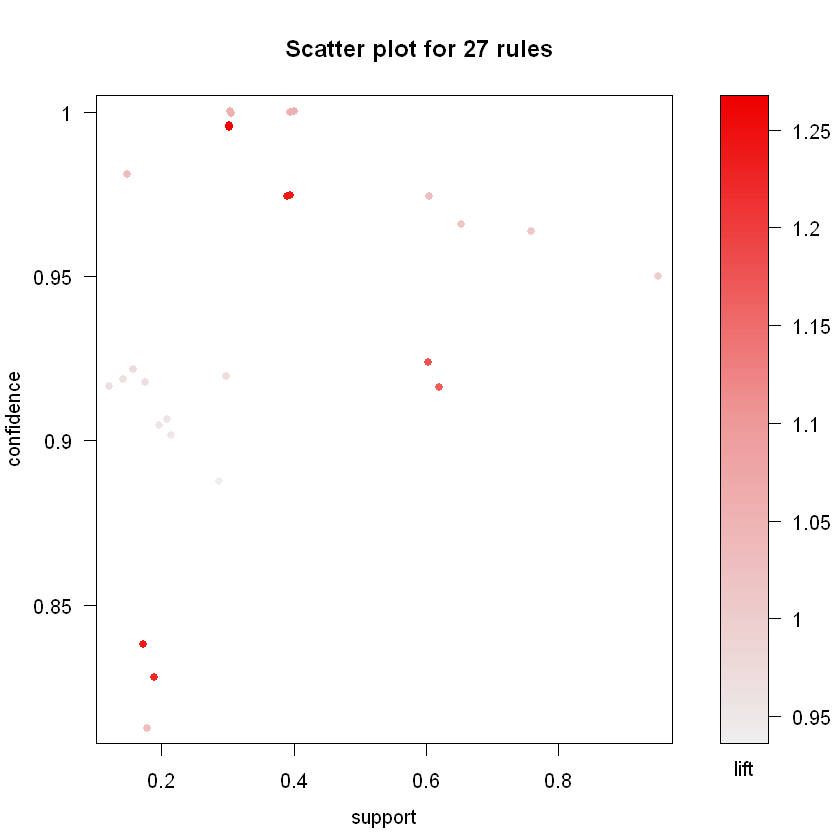

In [18]:
# figure 9.1 in PDF
plot(rules.all) # figure 9.1 in PDF

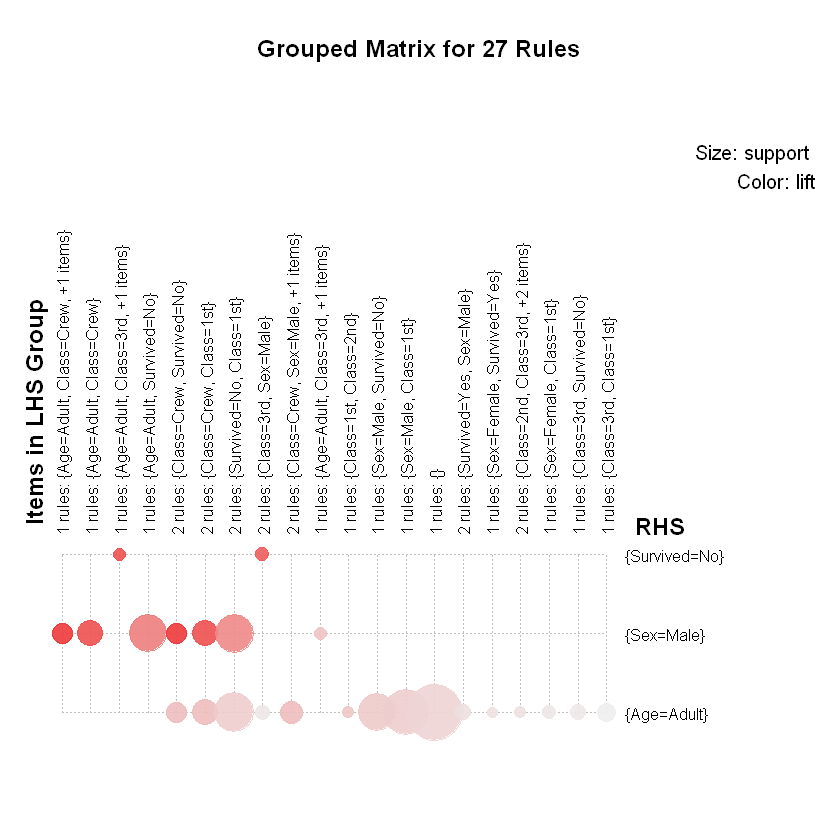

In [19]:
# figure 9.2 in PDF
plot(rules.all, method="grouped")

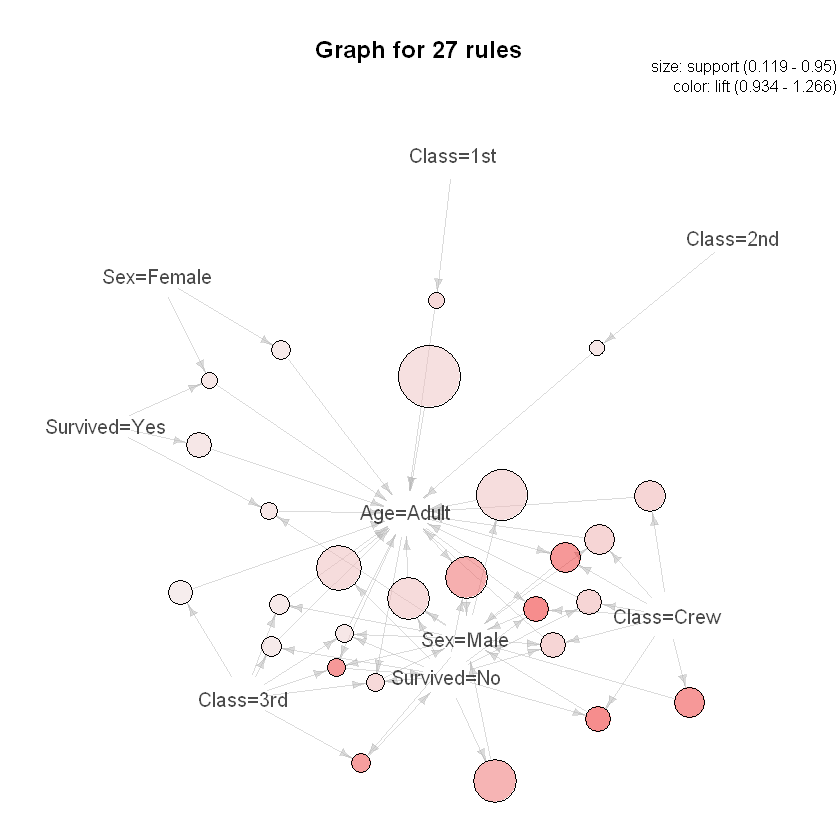

In [20]:
# figure 9.3 in PDF
plot(rules.all, method="graph")

Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Graph for 27 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EE

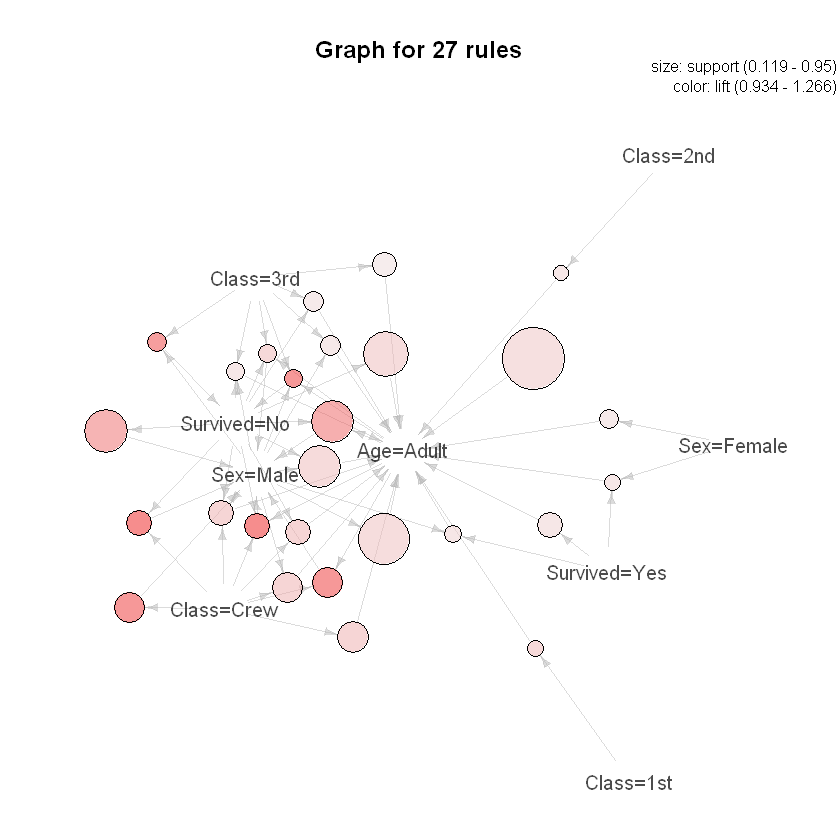

In [21]:
# figure 9.4
plot(rules.all, method="graph", control=list(type="items"))

Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Graph for 10 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EE

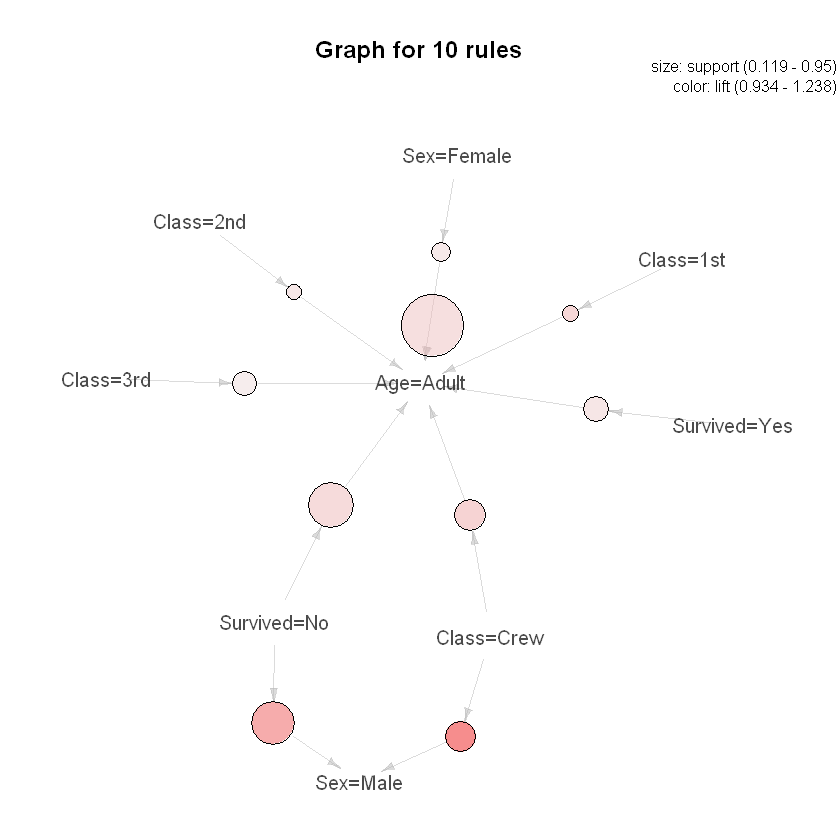

In [22]:
plot(rules.all[1:10,], method="graph", control=list(type="items"))